In [88]:
import numpy as np
import pandas as pd

df=pd.read_csv('zameen-updated.csv')

df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [89]:
df.shape

(168446, 20)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [91]:
columns_to_keep = ['property_id','property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms', 'Area Type', 'Area Size', 'latitude', 'longitude', 'purpose']


df_filtered = df[columns_to_keep]

df_filtered.to_csv('filtered_file.csv', index=False)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   property_type  168446 non-null  object 
 2   price          168446 non-null  int64  
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   baths          168446 non-null  int64  
 6   bedrooms       168446 non-null  int64  
 7   Area Type      168446 non-null  object 
 8   Area Size      168446 non-null  float64
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  purpose        168446 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 15.4+ MB


In [92]:
df_filtered.isnull().sum()

property_id      0
property_type    0
price            0
city             0
province_name    0
baths            0
bedrooms         0
Area Type        0
Area Size        0
latitude         0
longitude        0
purpose          0
dtype: int64

In [93]:
df_filtered.duplicated().sum()

0

/tmp/ipykernel_36/1899462884.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1899462884.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


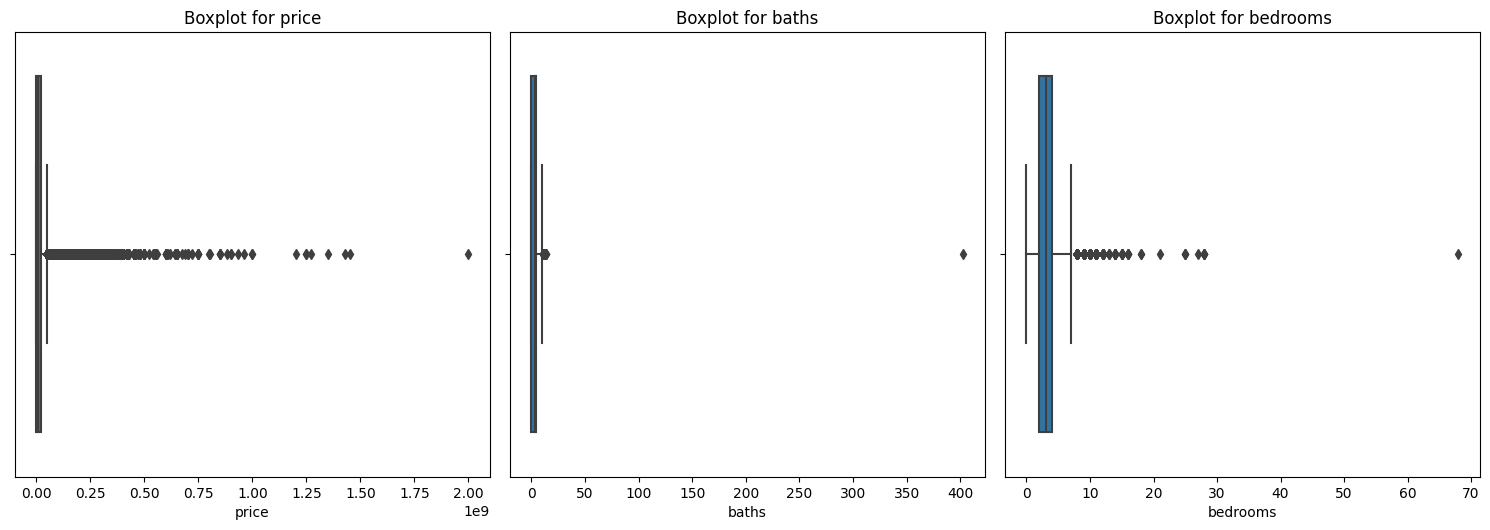

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ['price','baths','bedrooms']

plt.figure(figsize=(15, 10))

# Iterate through the columns and create a boxplot for each
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
   
plt.show()

In [95]:
# Calculate IQR for each column
Q1_price = df_filtered['price'].quantile(0.25)
Q3_price = df_filtered['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

Q1_baths = df_filtered['baths'].quantile(0.25)
Q3_baths = df_filtered['baths'].quantile(0.75)
IQR_baths = Q3_baths - Q1_baths
lower_limit_baths = Q1_baths - 1.5 * IQR_baths
upper_limit_baths = Q3_baths + 1.5 * IQR_baths

Q1_bedrooms = df_filtered['bedrooms'].quantile(0.25)
Q3_bedrooms = df_filtered['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
lower_limit_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_limit_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Remove outliers based on IQR
df_filtered = df_filtered[
    (df_filtered['price'] >= lower_limit_price) & (df_filtered['price'] <= upper_limit_price) &
    (df_filtered['baths'] >= lower_limit_baths) & (df_filtered['baths'] <= upper_limit_baths) &
    (df_filtered['bedrooms'] >= lower_limit_bedrooms) & (df_filtered['bedrooms'] <= upper_limit_bedrooms)
]

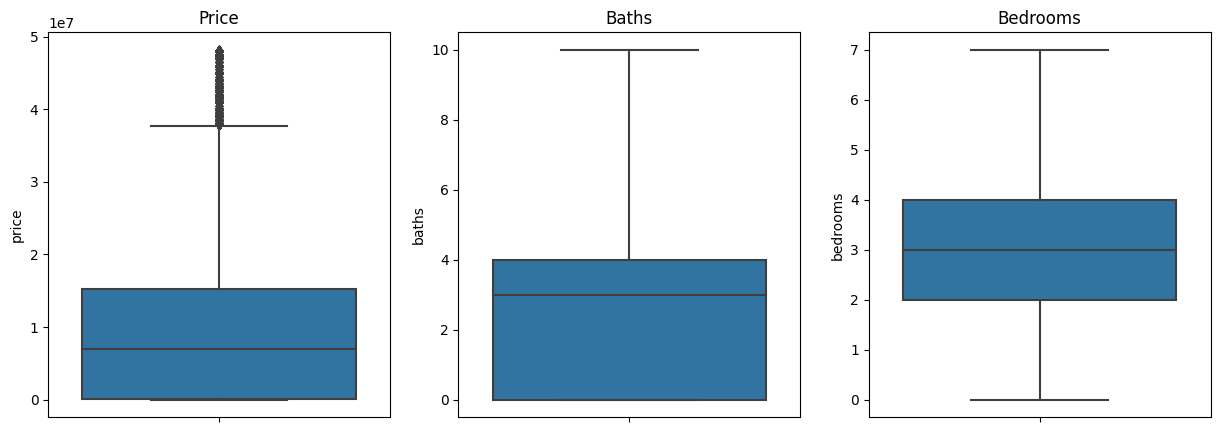

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df_filtered['price'], ax=axes[0]).set_title("Price")
sns.boxplot(y=df_filtered['baths'], ax=axes[1]).set_title("Baths")
sns.boxplot(y=df_filtered['bedrooms'], ax=axes[2]).set_title("Bedrooms")
plt.show()

In [97]:
removed_rows = df.shape[0] - df_filtered.shape[0]
print(f"Rows removed: {removed_rows} ({(removed_rows / df.shape[0]) * 100:.2f}% of data)")

Rows removed: 15783 (9.37% of data)


In [98]:
df_filtered.head()

,property_id,property_type,price,city,province_name,baths,bedrooms,Area Type,Area Size,latitude,longitude,purpose
0,237062,Flat,10000000,Islamabad,Islamabad Capital,2,2,Marla,4.0,33.679890,73.012640,For Sale
1,346905,Flat,6900000,Islamabad,Islamabad Capital,3,3,Marla,5.6,33.700993,72.971492,For Sale
2,386513,House,16500000,Islamabad,Islamabad Capital,6,5,Marla,8.0,33.631486,72.926559,For Sale
3,656161,House,43500000,Islamabad,Islamabad Capital,4,4,Kanal,2.0,33.707573,73.151199,For Sale
4,841645,House,7000000,Islamabad,Islamabad Capital,3,3,Marla,8.0,33.492591,73.301339,For Sale


In [99]:
df_filtered.property_type.unique()  #Use One-Hot Encoding

array(['Flat', 'House', 'Penthouse', 'Lower Portion', 'Upper Portion',
       'Room', 'Farm House'], dtype=object)

In [100]:
df_filtered.city.unique() #Use One-Hot Encoding

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [101]:
df_filtered.province_name.unique() #Use One-Hot Encoding

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [102]:
df_filtered['Area Type'].unique() #Use One-Hot Encoding

array(['Marla', 'Kanal'], dtype=object)

In [103]:
df_filtered.purpose.unique() #Use One-Hot Encoding

array(['For Sale', 'For Rent'], dtype=object)

In [104]:
# Apply One-Hot Encoding
df_filtered = pd.get_dummies(df_filtered, columns=['property_type'], drop_first=False)
df_filtered = pd.get_dummies(df_filtered, columns=['city'], drop_first=False)
df_filtered = pd.get_dummies(df_filtered, columns=['province_name'], drop_first=False)
df_filtered = pd.get_dummies(df_filtered, columns=['Area Type'], drop_first=False)
df_filtered = pd.get_dummies(df_filtered, columns=['purpose'], drop_first=False)

df_filtered.head()

,property_id,price,baths,bedrooms,Area Size,latitude,longitude,property_type_Farm House,property_type_Flat,property_type_House,...,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,Area Type_Kanal,Area Type_Marla,purpose_For Rent,purpose_For Sale
0,237062,10000000,2,2,4.0,33.679890,73.012640,False,True,False,...,False,False,False,True,False,False,False,True,False,True
1,346905,6900000,3,3,5.6,33.700993,72.971492,False,True,False,...,False,False,False,True,False,False,False,True,False,True
2,386513,16500000,6,5,8.0,33.631486,72.926559,False,False,True,...,False,False,False,True,False,False,False,True,False,True
3,656161,43500000,4,4,2.0,33.707573,73.151199,False,False,True,...,False,False,False,True,False,False,True,False,False,True
4,841645,7000000,3,3,8.0,33.492591,73.301339,False,False,True,...,False,False,False,True,False,False,False,True,False,True


In [105]:
encoded_columns = [col for col in df_filtered.columns if '_' in col]
encoded_column_counts = {}

for col in encoded_columns:
    original_column = col.split('_')[0]
    encoded_column_counts[original_column] = encoded_column_counts.get(original_column, 0) + 1

print(encoded_column_counts)


{'property': 8, 'city': 5, 'province': 3, 'Area Type': 2, 'purpose': 2}


In [106]:
df_filtered.describe()

,property_id,price,baths,bedrooms,Area Size,latitude,longitude
count,1.526630e+05,1.526630e+05,152663.000000,152663.000000,152663.000000,152663.000000,152663.000000
mean,1.562043e+07,1.036872e+07,2.674479,2.933533,6.017561,29.929570,71.275151
std,2.233343e+06,1.134843e+07,2.072392,1.708041,5.510362,3.797969,3.108200
min,2.370620e+05,0.000000e+00,0.000000,0.000000,0.000000,11.052446,25.906027
25%,1.493375e+07,1.100000e+05,0.000000,2.000000,3.400000,24.957127,67.133981
50%,1.668525e+07,7.000000e+06,3.000000,3.000000,5.000000,31.458979,73.056493
75%,1.708983e+07,1.520000e+07,4.000000,4.000000,8.000000,33.562800,73.218813
max,1.735772e+07,4.820000e+07,10.000000,7.000000,800.000000,73.184088,80.161430


In [107]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# List of columns for Min-Max Scaling
min_max_columns = ['property_id', 'price', 'baths', 'bedrooms', 'Area Size', 'latitude', 'longitude']

# Perform Min-Max Scaling on selected columns
df_filtered[min_max_columns] = minmax_scaler.fit_transform(df_filtered[min_max_columns])

df_filtered.head()


,property_id,price,baths,bedrooms,Area Size,latitude,longitude,property_type_Farm House,property_type_Flat,property_type_House,...,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,Area Type_Kanal,Area Type_Marla,purpose_For Rent,purpose_For Sale
0,0.000000,0.207469,0.2,0.285714,0.0050,0.364186,0.868238,False,True,False,...,False,False,False,True,False,False,False,True,False,True
1,0.006416,0.143154,0.3,0.428571,0.0070,0.364525,0.867480,False,True,False,...,False,False,False,True,False,False,False,True,False,True
2,0.008729,0.342324,0.6,0.714286,0.0100,0.363406,0.866652,False,False,True,...,False,False,False,True,False,False,False,True,False,True
3,0.024479,0.902490,0.4,0.571429,0.0025,0.364631,0.870792,False,False,True,...,False,False,False,True,False,False,True,False,False,True
4,0.035313,0.145228,0.3,0.428571,0.0100,0.361171,0.873559,False,False,True,...,False,False,False,True,False,False,False,True,False,True


In [108]:
df_filtered.describe()

,property_id,price,baths,bedrooms,Area Size,latitude,longitude
count,152663.000000,152663.000000,152663.000000,152663.000000,152663.000000,152663.000000,152663.000000
mean,0.898527,0.215119,0.267448,0.419076,0.007522,0.303825,0.836214
std,0.130447,0.235445,0.207239,0.244006,0.006888,0.061128,0.057288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.858418,0.002282,0.000000,0.285714,0.004250,0.223794,0.759887
50%,0.960722,0.145228,0.300000,0.428571,0.006250,0.328440,0.869046
75%,0.984353,0.315353,0.400000,0.571429,0.010000,0.362301,0.872038
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
print(df_filtered.columns.tolist())

['property_id', 'price', 'baths', 'bedrooms', 'Area Size', 'latitude', 'longitude', 'property_type_Farm House', 'property_type_Flat', 'property_type_House', 'property_type_Lower Portion', 'property_type_Penthouse', 'property_type_Room', 'property_type_Upper Portion', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital', 'province_name_Punjab', 'province_name_Sindh', 'Area Type_Kanal', 'Area Type_Marla', 'purpose_For Rent', 'purpose_For Sale']


In [110]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Step 1: Define your features (X) and target variable (y)
X = df_filtered[['baths', 'bedrooms', 'Area Size', 'latitude', 'longitude', 'property_type_Farm House', 'property_type_Flat', 'property_type_House', 'property_type_Lower Portion', 'property_type_Penthouse', 'property_type_Room', 'property_type_Upper Portion', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital', 'province_name_Punjab', 'province_name_Sindh', 'Area Type_Kanal', 'Area Type_Marla', 'purpose_For Rent', 'purpose_For Sale']]
y = df_filtered['price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the XGBoost model
model = XGBRegressor(n_estimators=497, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=497, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the R² score (model performance)
r2 = model.score(X_test, y_test)*100
print(f'R² Score: {r2}')

y_pred = model.predict(X_test)

# Calculate other evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R² Score: 93.23426081988909
Mean Absolute Error (MAE): 0.03314087891962019
Mean Squared Error (MSE): 0.003694048747975047
Root Mean Squared Error (RMSE): 0.06077868662594682


In [112]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 6] 
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 497}
Best Score: 0.9310403072888856


In [113]:
import joblib

trained_model = model

joblib.dump(trained_model, 'house_price_model.pkl')

print("Model saved successfully!")

Model saved successfully!
